In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_validate
#from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import axes3d
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# processing the data

col_names = ['ID','Name','Sex','Age','Height','Weight','Team','NOC', 'Games','Year','Season','City','Sport','Event','Medal','Game_Med_Per','1896-1924-1','1896-1924-0','1928-1956-1','1928-1956-0','1960-1988-1','1960-1988-0','1992-2016-1','1992-2016-0','Ath_Cnt']

df = pd.read_csv('athletes_medal_yes_no.csv', usecols=col_names)

df['Medal'].fillna(0, inplace=True)
df = df.replace({'Medal': {'Gold': 1, 'Silver': 1, 'Bronze': 1}})
df = df.dropna(axis=0)

# Storing the numeric values in python dictionary to be referenced later for testing with new data

NOC_Map = {}

for i, j in enumerate(np.unique(df['NOC'])):
    NOC_Map[j] = i

    Sport_Map = {}

for i, j in enumerate(np.unique(df['Sport'])):
    Sport_Map[j] = i

    Event_Map = {}

for i, j in enumerate(np.unique(df['Event'])):
    Event_Map[j] = i

#print (df.shape)
#print (df)

In [2]:
# Numeric Enumeration
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['NOC']))}
class_mapping
df['NOC'] = df['NOC'].map(class_mapping)
df

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['City']))}
class_mapping
df['City'] = df['City'].map(class_mapping)
df

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Name']))}
class_mapping
df['Name'] = df['Name'].map(class_mapping)
df

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Team']))}
class_mapping
df['Team'] = df['Team'].map(class_mapping)
df

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Games']))}
class_mapping
df['Games'] = df['Games'].map(class_mapping)
df

'''class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Season']))}
class_mapping
df['Season'] = df['Season'].map(class_mapping)
df'''

'''class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Sex']))}
class_mapping
df['Sex'] = df['Sex'].map(class_mapping)
df'''

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Sport']))}
class_mapping
df['Sport'] = df['Sport'].map(class_mapping)
df

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Event']))}
class_mapping
df['Event'] = df['Event'].map(class_mapping)
df



col_names = ['Name','Sex','Age','Height','Weight','Team','NOC', 'Games','Year','Season','City','Sport','Event','1896-1924-0','1896-1924-1','1896-1924-2','1896-1924-3','1928-1956-0','1928-1956-1','1928-1956-2','1928-1956-3','1960-1988-0','1960-1988-1','1960-1988-2','1960-1988-3','1992-2016-0','1992-2016-1','1992-2016-2','1992-2016-3']
col_names1 = ['Sex','Age','Height','Weight','NOC','Year','Season','Sport','Event','Game_Med_Per','1896-1924-Med','1928-1956-Med','1960-1988-Med','1992-2016-Med','1896-1924-0','1896-1924-1','1896-1924-2','1896-1924-3','1928-1956-0','1928-1956-1','1928-1956-2','1928-1956-3','1960-1988-0','1960-1988-1','1960-1988-2','1960-1988-3','1992-2016-0','1992-2016-1','1992-2016-2','1992-2016-3']

col_names2 = ['Sex','Age','Height','Weight','NOC','Year','Season','Sport']

col_names3 = ['Sex','Age','Height','Weight','NOC','Year','Season','Sport','Event','Game_Med_Per','1896-1924-1','1896-1924-0','1928-1956-1','1928-1956-0','1960-1988-1','1960-1988-0','1992-2016-1','1992-2016-0','Ath_Cnt']

# one hot encoding
X = df[col_names3].values 
color_le = LabelEncoder() 
X[:, 0] = color_le.fit_transform(X[:, 0])
X
X[:, 6] = color_le.fit_transform(X[:, 6])
X
#print (X)
ohe = OneHotEncoder(categorical_features=[0,6])
ohe.fit_transform(X).toarray()
#df = DataFrame(pd.get_dummies(df[col_names]))
pd.get_dummies(df[col_names3])

X = pd.get_dummies(df[col_names3]).as_matrix()

y = pd.get_dummies(df['Medal']).as_matrix()
#y = df['Medal'].values
print (y.shape)
print (y)
#X = df[].values 
#print (df)
print (X.shape[1])
print (X.shape)
print (X)



C:\Users\Prashamsh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Prashamsh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(270673, 2)
[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
21
(270673, 21)
[[ 24.         180.          80.         ...   1.           1.
    0.        ]
 [ 23.         170.          60.         ...   1.           1.
    0.        ]
 [ 24.         179.2009967   73.83750728 ...   1.           1.
    0.        ]
 ...
 [ 27.         176.          59.         ...   1.           0.
    1.        ]
 [ 30.         185.          96.         ...   1.           0.
    1.        ]
 [ 34.         185.          96.         ...   1.           0.
    1.        ]]


C:\Users\Prashamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Prashamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [3]:
#splitting data into training and testing sets. Converting data into a scalar
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=50)

#pca = PCA(n_components=13)
#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)
#X_pca = pca.transform(X)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

In [4]:
# Training the model using feed forward neural networks

from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD
NN_model = Sequential()


# The Input Layer :

NN_model.add(Dense(100, input_dim = 21, activation='relu'))



# The Hidden Layers :

NN_model.add(Dense(200, activation='relu'))
NN_model.add(Dense(50, activation='relu'))

NN_model.add(Dense(15, activation='relu'))

NN_model.add(Dense(2, activation='sigmoid'))



# Compile the network :
sgd = SGD(lr=0.005)

NN_model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

NN_model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2200      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_4 (Dense)              (None, 15)                765       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 32        
Total params: 33,247
Trainable params: 33,247
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Defining parameters to fit the model
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=0, mode='auto')

checkpointer = ModelCheckpoint(filepath='best_weights.hdf5',verbose=0, save_best_only=True)

In [6]:
# Fitting the model
history = NN_model.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test), batch_size = 128, callbacks=[monitor, checkpointer], verbose=0, epochs=100)
NN_model.load_weights('best_weights.hdf5')

Instructions for updating:
Use tf.cast instead.


In [7]:
#Plotting confision matrix and classification report
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
pred=NN_model.predict(X_test_scaled)
pred = np.argmax(pred, axis=1)
y_test2 = np.argmax(y_test, axis=1)

y_test2 = np.where(y_test2==0, 'None', y_test2)
y_test2 = np.where(y_test2=='1', 'Medal', y_test2)

pred = np.where(pred==0, 'None', pred)
pred = np.where(pred=='1', 'Medal', pred)

cm = confusion_matrix(y_test2, pred)
np.set_printoptions(precision=2)
print ('Confusion_matrix')
print (cm)


#plt.figure()
print (classification_report(y_test2,pred))
#print (pred[:1000])



Confusion_matrix
[[ 2225  1677]
 [  686 22480]]
              precision    recall  f1-score   support

       Medal       0.76      0.57      0.65      3902
        None       0.93      0.97      0.95     23166

   micro avg       0.91      0.91      0.91     27068
   macro avg       0.85      0.77      0.80     27068
weighted avg       0.91      0.91      0.91     27068



C:\Users\Prashamsh\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


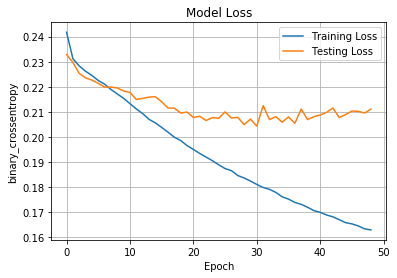

Loss after final iteration:  0.21109052489960195


In [8]:
# Plotting and claculating loss
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1, figsize=(6,4))
xc = range(200)
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('binary_crossentropy')
plt.xlabel('Epoch')
plt.grid('True')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')

plt.show()
print ("Loss after final iteration: ", history.history['val_loss'][-1])

Accuracy after final iteration:  0.9141606324195016


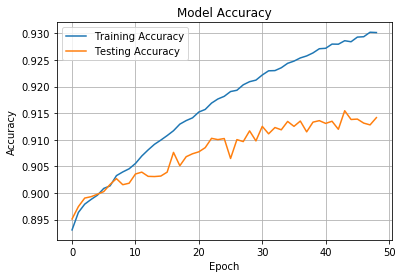

In [9]:
#Plotting accuracy and calculating accuracy
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(1, figsize=(6,4))
xc = range(200)
# # summarize history for loss
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid('True')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper left')
print ("Accuracy after final iteration: ", history.history['val_acc'][-1])
plt.show()

In [10]:
# Prediction on new data
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix


col_names_test = ['Sex','Age','Height','Weight','NOC','Year','Season','Sport','Event','Game_Med_Per','1896-1924-1','1896-1924-0','1928-1956-1','1928-1956-0','1960-1988-1','1960-1988-0','1992-2016-1','1992-2016-0','Ath_Cnt','Sex_F','Sex_M','Season_Summer','Season_Winter']

df1 = pd.read_csv('athletes_Medyesno_test.csv', usecols = col_names_test)

col_names_test4 = ['NOC','1896-1924-1','1896-1924-0','1928-1956-1','1928-1956-0','1960-1988-1','1960-1988-0','1992-2016-1','1992-2016-0']
df2 = pd.read_csv('athletes_year_percentmedpred.csv', usecols = col_names_test4)

col_names_test5 = ['NOC','Event','Game_Med_Per']

df3 = pd.read_csv('athletes_country_event_medyesno.csv', usecols = col_names_test5)

col_names_test6 = ['NOC','Year','Ath_Cnt']

df4 = pd.read_csv('athletes_cntyesno.csv', usecols = col_names_test6)

#print (df1)

for i in range(len(df1)):
    for j in range(len(df2)):
        if df2.iloc[j,0] == df1.iloc[i,4]:
            df1.iloc[i,10] = df2.iloc[j,1]
            df1.iloc[i,11] = df2.iloc[j,2]
            df1.iloc[i,12] = df2.iloc[j,3]
            df1.iloc[i,13] = df2.iloc[j,4]
            df1.iloc[i,14] = df2.iloc[j,5]
            df1.iloc[i,15] = df2.iloc[j,6]
            df1.iloc[i,16] = df2.iloc[j,7]
            df1.iloc[i,17] = df2.iloc[j,8]
            j = len(df2)
    for k in range(len(df3)):
        if (df3.iloc[k,0] == df1.iloc[i,4] and df3.iloc[k,1] == df1.iloc[i,8]):
            df1.iloc[i,9] = df3.iloc[k,2]
            k = len(df3)
    
    if df1.iloc[i,5] > 2016:
        pass
    else:
        for l in range(len(df4)):
            if (df4.iloc[l,0] == df1.iloc[i,4] and df4.iloc[l,1] == df1.iloc[i,5]):
                df1.iloc[i,18] = df4.iloc[l,2]
                l = len(df4)

            
#print (df1)

for i in range(len(df1)):
    df1.iloc[i,4] = NOC_Map[df1.iloc[i,4]]
    df1.iloc[i,7] = Sport_Map[df1.iloc[i,7]]
    df1.iloc[i,8] = Event_Map[df1.iloc[i,8]]
    if df1.iloc[i,0] == 'M':
        df1.iloc[i,19] = 0
        df1.iloc[i,20] = 1
    else:
        df1.iloc[i,20] = 0
        df1.iloc[i,19] = 1
        
    if df1.iloc[i,6] == 'Winter':
        df1.iloc[i,21] = 0
        df1.iloc[i,22] = 1
    else:
        df1.iloc[i,22] = 0
        df1.iloc[i,21] = 1

col_names_test1 = ['Age','Height','Weight','NOC','Year','Sport','Event','Game_Med_Per','1896-1924-1','1896-1924-0','1928-1956-1','1928-1956-0','1960-1988-1','1960-1988-0','1992-2016-1','1992-2016-0','Ath_Cnt','Sex_F','Sex_M','Season_Summer','Season_Winter']
        
#df2 = df1[col_names_test1].values
#print (df2)
#print (df1)



X1 = df1[col_names_test1].values
print (X1.shape)

#stdscaler = preprocessing.StandardScaler().fit(X_train_pca)
#X1_train_scaled = stdscaler.transform(X1_train)

#X1 = pca.transform(X1)
X1 = stdscaler.transform(X1)


pred_test=NN_model.predict(X1)
pred_test = np.argmax(pred_test, axis=1)

#print (X1)
#print (X1.shape)
#print (pred_test.shape)
print (pred_test)
print (pred_test.shape)
print (df1.shape)
#print (df1)
#print (df1)

(74, 21)
[0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1
 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0]
(74,)
(74, 23)


In [12]:
# Prediction on new data using widgets
import ipywidgets as widgets
from IPython.display import display
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from IPython.display import clear_output
import sys
import time

col_names_test = ['Sex','Age','Height','Weight','NOC','Year','Season','Sport','Event','Game_Med_Per','1896-1924-1','1896-1924-0','1928-1956-1','1928-1956-0','1960-1988-1','1960-1988-0','1992-2016-1','1992-2016-0','Ath_Cnt','Sex_F','Sex_M','Season_Summer','Season_Winter']

df1 = pd.read_csv('UIathletes_Medyesno_test.csv', usecols = col_names_test)

col_names_test4 = ['NOC','1896-1924-1','1896-1924-0','1928-1956-1','1928-1956-0','1960-1988-1','1960-1988-0','1992-2016-1','1992-2016-0']
df2 = pd.read_csv('athletes_year_percentmedpred.csv', usecols = col_names_test4)

col_names_test5 = ['NOC','Event','Game_Med_Per']

df3 = pd.read_csv('athletes_country_event_medyesno.csv', usecols = col_names_test5)

col_names_test6 = ['NOC','Year','Ath_Cnt']

df4 = pd.read_csv('athletes_cntyesno.csv', usecols = col_names_test6)

class learn_classes_and_widgets():
    def __init__(self, param1='', param2='', param3='', param4='', param5='', param6='', param7='', param8='', param9='',param10=''):
        self.p1_text = widgets.Text(description = 'Sex M\F',value = param1)
        self.p2_text = widgets.Text(description = 'Age in years',value = param2)
        self.p3_text = widgets.Text(description = 'Height in cm',value = param3)
        self.p4_text = widgets.Text(description = 'Weight in Kgs',value = param4)
        self.p5_text = widgets.Text(description = 'Country Abbr',value = param5)
        self.p6_text = widgets.Text(description = 'Year',value = param6)
        self.p7_text = widgets.Text(description = 'Season Summer\Winter',value = param7)
        self.p8_text = widgets.Text(description = 'Sport',value = param8)
        self.p9_text = widgets.Text(description = 'Event',value = param9)
        self.p10_text = widgets.Text(description = 'Ath_Count',value = param10)
        self.p_button = widgets.Button(description="Get Medal Pred", value= param1)
        self.p_button.on_click(self.handle_submit)
        display(self.p1_text, self.p2_text, self.p3_text, self.p4_text, self.p5_text, self.p6_text,self.p7_text, self.p8_text, self.p9_text,self.p10_text,self.p_button,)
    
    def handle_submit(self, text):      
        count = 0
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        if (self.p1_text.value == '' or self.p2_text.value == '' or self.p3_text.value == '' or self.p4_text.value == '' or self.p5_text.value == '' or self.p6_text.value == '' or self.p7_text.value == '' or self.p8_text.value == '' or self.p9_text.value == ''):
            print ('One or More inputs missing')
            return 'Please input your values'
        
        df1.iloc[0,0] = str(self.p1_text.value)
        df1.iloc[0,1] = int(self.p2_text.value)
        df1.iloc[0,2] = int(self.p3_text.value)
        df1.iloc[0,3] = int(self.p4_text.value)
        df1.iloc[0,4] = str(self.p5_text.value)
        df1.iloc[0,5] = int(self.p6_text.value)
        df1.iloc[0,6] = str(self.p7_text.value)
        df1.iloc[0,7] = str(self.p8_text.value)
        df1.iloc[0,8] = str(self.p9_text.value)
       
        for i in range(len(df1)):  
            for j in range(len(df2)):
                if df2.iloc[j,0] == df1.iloc[i,4]:
                    count = 1
                    df1.iloc[i,10] = df2.iloc[j,1]
                    df1.iloc[i,11] = df2.iloc[j,2]
                    df1.iloc[i,12] = df2.iloc[j,3]
                    df1.iloc[i,13] = df2.iloc[j,4]
                    df1.iloc[i,14] = df2.iloc[j,5]
                    df1.iloc[i,15] = df2.iloc[j,6]
                    df1.iloc[i,16] = df2.iloc[j,7]
                    df1.iloc[i,17] = df2.iloc[j,8]
                    j = len(df2)
            for k in range(len(df3)):
                if (df3.iloc[k,0] == df1.iloc[i,4] and df3.iloc[k,1] == df1.iloc[i,8]):
                    df1.iloc[i,9] = df3.iloc[k,2]
                    k = len(df3)
                    count1 = 1

            if df1.iloc[i,5] > 2016:
                count2 = 1
                df1.iloc[0,18] = str(self.p10_text.value)
            else:
                for l in range(len(df4)):
                    if (df4.iloc[l,0] == df1.iloc[i,4] and df4.iloc[l,1] == df1.iloc[i,5]):
                        df1.iloc[i,18] = df4.iloc[l,2]
                        l = len(df4)
                        count2 = 1

            if count == 0:
                print ("Invalid Country Abbrevation")
                return 'Please input your values'
            elif count1 == 0:
                print ("Invalid Event Name")
                return 'Please input your values'
            elif count2 == 0:
                print ("Invalid Year")
                return 'Please input your values'
                        
            df1.iloc[i,4] = NOC_Map[df1.iloc[i,4]]
            df1.iloc[i,7] = Sport_Map[df1.iloc[i,7]]
            df1.iloc[i,8] = Event_Map[df1.iloc[i,8]]
            if df1.iloc[i,0] == 'M':
                df1.iloc[i,19] = 0
                df1.iloc[i,20] = 1
                count3 = 1
            elif df1.iloc[i,0] == 'F':
                df1.iloc[i,20] = 0
                df1.iloc[i,19] = 1
                count3 = 1

            if df1.iloc[i,6] == 'Winter':
                df1.iloc[i,21] = 0
                df1.iloc[i,22] = 1
                count4 = 1
            elif df1.iloc[i,6] == 'Summer':
                df1.iloc[i,22] = 0
                df1.iloc[i,21] = 1
                count4 = 1
        
                
        if count3 == 0:
            print ("Invalid Gender")
            return 'Please input your values'
        if count4 == 0:
            print ("Invalid Season")
            return 'Please input your values'
        
        col_names_test1 = ['Age','Height','Weight','NOC','Year','Sport','Event','Game_Med_Per','1896-1924-1','1896-1924-0','1928-1956-1','1928-1956-0','1960-1988-1','1960-1988-0','1992-2016-1','1992-2016-0','Ath_Cnt','Sex_F','Sex_M','Season_Summer','Season_Winter']
        X1 = df1[col_names_test1].values
        X1 = stdscaler.transform(X1)
        pred_test=NN_model.predict(X1)
        pred_test = np.argmax(pred_test, axis=1)
        
        if pred_test == 0:
                print ('The Athelete is predicted to win no Medal')
        if pred_test == 1:
                print ('The Athelete is predicted to win a Medal')
                
f = learn_classes_and_widgets(param1 = '')



Text(value='', description='Sex M\\F')

Text(value='', description='Age in years')

Text(value='', description='Height in cm')

Text(value='', description='Weight in Kgs')

Text(value='', description='Country Abbr')

Text(value='', description='Year')

Text(value='', description='Season Summer\\Winter')

Text(value='', description='Sport')

Text(value='', description='Event')

Text(value='', description='Ath_Count')

Button(description='Get Medal Pred', style=ButtonStyle())